<a href="https://colab.research.google.com/github/szgula/UofG/blob/main/CSI/CSI_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 

### Computational Social Intelligence

By: Szymon Gula (2601553G@student.gla.ac.uk)

## **First part**

**For each of the above questions you are expected to perform the following tasks:**

* To formulate a clear research hypothesis and, correspondingly, a suitable null hypothesis;
 To select an appropriate statistical test among those that have been presented during the course;
* To explain whether you reject the null hypothesis and, if yes, what is the confidence level.
* To explain whether you use a two-tailed or a one-tailed test and why.


**You have to show that you know how to calculate the statistic you use for the test (Chi Square or Student’s t**

**The report must include a general description of the problem and, for each of the research questions in Section 3, the following elements:**
* Formulation of research hypothesis and corresponding null hypothesis;
* Description of the data, e.g., number of laughter occurrences for female and male subjects, average and
variance of laughter length for female and male subjects, etc.;
* Description of the approach, e.g., which test? What are the parameters (degrees of freedom,
expectations, etc.) and what is the motivation behind every choice (why a certain test? Why a certain
value of the parameters?);
* Results of the hypothesis testing (can the null hypothesis be rejected? What is the confidence level?
Etc.);
* Explanation of the results (e.g., in case the test shows that the number of laughter events is higher for
female subjects to a statistically significant extent, you should mention that your conclusion is that
female subjects tend to laugh more than male ones);
* Analysis software you have written (the code must be added in appendix);

**The report should not include more than one page per each of the questions to be addressed.**


### 1) Setup Environment 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.stats import chisquare, ttest_ind
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) Load data and pre-process it

In [ ]:
path_ = r'/content/drive/My Drive/Colab Notebooks/laughter-corpus.csv'
data = pd.read_csv(path_)
nr_males = 57        # number of males in the experiment
nr_females = 63      # number of females in the experiment
all_participants = nr_males + nr_females

In [ ]:
data.head()

,Gender,Role,Duration
0,Female,Caller,0.961
1,Male,Receiver,0.630
2,Female,Caller,1.268
3,Male,Receiver,0.146
4,Female,Caller,0.276


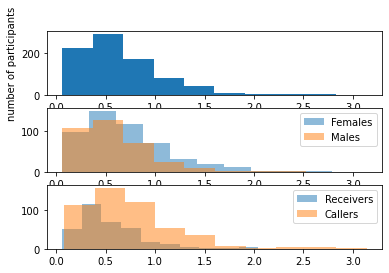

In [ ]:
plt.subplot(311)
plt.hist(data.Duration, label='all')
plt.xlabel('length of laught')
plt.ylabel('number of participants')

plt.subplot(312)
plt.hist(data[data.Gender == 'Female'].Duration, label='Females', alpha=0.5)
plt.hist(data[data.Gender == 'Male'].Duration, label='Males', alpha=0.5)
plt.legend()

plt.subplot(313)
plt.hist(data[data.Role == 'Receiver'].Duration, label='Receivers', alpha=0.5)
plt.hist(data[data.Role == 'Caller'].Duration, label='Callers', alpha=0.5)
plt.legend()

## 1) Is the number of laughter events higher for women than for men?

To answer the question, we need to compare two groups and test if the null hypothesis can be rejected for assumed alpha (0.05).

For given question the null hypothesis is: **The numbers of events for males and females are the same**

One possible way to confirm or reject given null hypothesis is to use a chi-squared test. To execute the test we colect the data in following structure:


> ||Expected Value | Measured Value
> |---|--- | ---
> |**Males**|$E_{all} \frac{N_{males}}{ N_{all}} $ | $E_{males} $ 
> |**Females**|$E_{all} \frac{N_{females}}{ N_{all}} $ | $E_{females} $ 

>$ \{N_{males},  N_{females}\}$ - number of {males, females} in experiment

>$N_{all} = N_{males} + N_{females}$

>$ \{E_{males},  E_{females}\}$ - number of laughter events for {males, females}

>$E_{all} = E_{males} + E_{females}$

In [ ]:
male_events, female_events = sum(data.Gender == 'Male'), sum(data.Gender == 'Female')
all_gender_events = male_events + female_events
print(f'male_events = {male_events}, female_events = {female_events}')

normalized_gender_events = np.array([male_events, female_events]) / all_gender_events
normalized_gender_expected = np.array([nr_males, nr_females]) / all_participants
print(f'normalized_events = {normalized_gender_events}, normalized_expected = {normalized_gender_expected}')

male_events = 346, female_events = 496
normalized_events = [0.41092637 0.58907363], normalized_expected = [0.475 0.525]


In [ ]:
chisq, p_value = chisquare(normalized_gender_events, normalized_gender_expected)
print(f'chi-square value = {chisq:.4f}, \np_value = {p_value:.4f}, \np_value < 0.05 = {p_value<0.05}')

chi-square value = 0.0165, 
p_value = 0.8979, 
p_value < 0.05 = False


The Chi-sqiare test result for null hypothesis (The numbers of events for males and females are the same) are displayed aboved.

**With alpha=0.05 we do not find evidence for rejecting null hypothesis**

## 2) Is the number of laughter events higher for callers than for receivers?

To answer the question, we need to compare two groups and test if the null hypothesis can be rejected for assumed alpha (0.05).

For given question the null hypothesis is: **The numbers of events for callers and receivers are the same**

One possible way to confirm or reject given null hypothesis is to use a chi-squared test. To execute the test we colect the data in following structure:


> ||Expected Value | Measured Value
> |---|--- | ---
> |**Callers**|$0.5*E_{roleAll} $ | $E_{Call} $ 
> |**Receivers**|$0.5*E_{roleAll} $ | $E_{Rec} $ 


>$ \{E_{Call},  E_{Rec}\}$ - number of laughter events for {Callers, Receivers}

>$E_{roleAll} = E_{Call} + E_{Rec}$

Number of degrees of freedom: (number_of_rows - 1) * (number_of_columns - 1) = 1

In [ ]:
receiver_events, caller_events  = sum(data.Role == 'Receiver'), sum(data.Role == 'Caller')
all_role_events = receiver_events + caller_events
print(f'caller_events = {caller_events}, receiver_events = {receiver_events}')

normalized_role_events = np.array([caller_events, receiver_events]) / all_role_events
normalized_role_expected = np.array([all_participants / 2, all_participants / 2]) / all_participants
print(f'normalized_events = {normalized_role_events}, normalized_expected = {normalized_role_expected}')

caller_events = 505, receiver_events = 337
normalized_events = [0.59976247 0.40023753], normalized_expected = [0.5 0.5]


In [ ]:
chisq, p_value = chisquare(normalized_role_events, normalized_role_expected)
print(f'chi-square value = {chisq:.4f}, \np_value = {p_value:.4f}, \np_value < 0.05 = {p_value<0.05}')

chi-square value = 0.0398, 
p_value = 0.8419, 
p_value < 0.05 = False


The Chi-sqiare test result for null hypothesis (The numbers of events for caller and receiver are the same) are displayed aboved.

**With alpha=0.05 we do not find evidence for rejecting null hypothesis**

## 3) Are laughter events longer for women?

To answer the question, we need to compare two real values and test if the null hypothesis can be rejected for assumed alpha (0.05).

For given question the null hypothesis is: **The laughter events length is same for females and males**

One possible way to confirm or reject given null hypothesis is to use a **t-test**, as the process real distribution is unknown. To be more specific, we need to execute **one-tailed t-test** on the measured data - as our orgin hypothesis states "how" two groups differ.

The hypothesis is based on the comparison of two independent groups means with unknown population variance.

In [ ]:
# TODO -> execute test to check if we can conduct the T-test
# TODO: use one sided test

In [ ]:
male_events_length = data[data.Gender == 'Male'].Duration
m_len_mean = male_events_length.mean()
m_len_std = male_events_length.std()
female_events_length = data[data.Gender == 'Female'].Duration
f_len_mean = female_events_length.mean()
f_len_std = female_events_length.std()
print(f'male_events_length:   mean = {m_len_mean:.4f}, std = {m_len_std:.4f} \nfemale_events_length: mean = {f_len_mean:.4f}, std = {f_len_std:.4f}')

male_events_length:   mean = 0.6062, std = 0.4047 
female_events_length: mean = 0.7097, std = 0.4416


In [ ]:
t_statistic, t_p_value = ttest_ind(female_events_length, male_events_length, equal_var=False)
t_p_value = t_p_value / 2 # To get one-tailed p_values from two-tailed test
print(f't statistics value = {t_statistic:.4f}, p-value = {t_p_value:.4f}')

t statistics value = 3.5146, p-value = 0.0002


The one-sided t-test result for null hypothesis (The length of events for males and females are the same) are displayed aboved.

**With alpha=0.05 we can reject the null hypothesis.**

In other words - we can find evidence that females laugher events are longer than males (as t_statistic > 0)

## 4) Are laughter events longer for callers?

In [ ]:
# TODO: use one sided test

In [ ]:
rec_events_length = data[data.Role == 'Receiver'].Duration
r_len_mean = rec_events_length.mean()
r_len_std = rec_events_length.std()
call_events_length = data[data.Role == 'Caller'].Duration
c_len_mean = call_events_length.mean()
c_len_std = call_events_length.std()
print(f'rec_events_length:   mean = {r_len_mean:.4f}, std = {r_len_std:.4f} \ncall_events_length: mean = {c_len_mean:.4f}, std = {c_len_std:.4f}')

rec_events_length:   mean = 0.5494, std = 0.3461 
call_events_length: mean = 0.7458, std = 0.4611


In [ ]:
t_statistic, t_p_value = ttest_ind(call_events_length, rec_events_length, equal_var=False)
t_p_value = t_p_value / 2 # To get one-tailed p_values from two-tailed test
print('The T-test result for null hypothesis (The length of events for males and females are the same):')
print(f't statistics value = {t_statistic:.4f}, p-value = {t_p_value:.4f}')
print('With alpha=0.05 we can reject the null hypothesis.') 
print('In other words - we can find evidence that callers laugher events are longer than recivers (as t_statistic > 0)')

The T-test result for null hypothesis (The length of events for males and females are the same):
t statistics value = 7.0469, p-value = 0.0000
With alpha=0.05 we can reject the null hypothesis.
In other words - we can find evidence that callers laugher events are longer than recivers (as t_statistic > 0)


In [ ]:
ttest_ind(rec_events_length, call_events_length, equal_var=False)

Ttest_indResult(statistic=-7.04692595020516, pvalue=3.851047008141747e-12)

## **Second part**

**The report must include the following elements:**

* An introduction to the problem of facial expression analysis;
* A description of the theory underlying the Gaussian Discriminant Functions;
* A description of the experimental setup (training and test set, etc.);
* A description of the results;
* The software you have written (the code must be added in appendix);

The report should not include more than one page per each of the points above.

#### **Discrimination function**
Discrimination function is called function $ \gamma_M(x) \rightarrow C_M $ that maps feature vector $x$ into class $C_M$.

For the Bayes classifier we can write:

$ \gamma_M(x) = -R( \beta | x) \propto P(C_M | x) - 1 \propto  P(C_M | x) = P(x | C_M) * P(C_M) / P(x) $

*Where $ R() $ is condition risk, $\propto$ means proportional to.*

Now we can apply logarith to both side. $ \gamma_M'(x) = ln( \gamma_M(x)) $:

$ \gamma_M'(x) = ln[P(x | C_M) * P(C_M) / P(x)] = ln[P(x | C_M)] + ln[P(C_M)] - ln[x] \propto ln[P(x | C_M)] + ln[P(C_M)]$


#### **Gaussian Likelihood**

Under assumption that P(x | C_M) has normal distribution  ($ N(\mu_M, \Sigma) $)we can write that:

$ \gamma_M'(x) = 
-\frac{n*ln[2 \pi]} { 2 }
- \frac{ln[\Sigma]}{2}
- \frac{(x- \mu_M)^T \Sigma^{-1} (x- \mu_M)} {2}
+ ln[p(C_M)] 
$

Since $n*ln[2 \pi]$ is constants, we can simplifie $ \gamma_M'(x)$:

$ \gamma_M''(x) = - \frac{ln[\Sigma]}{2} - \frac{(x- \mu_M)^T \Sigma^{-1} (x- \mu_M)} {2} + ln[p(C_M)] $.

For simplicity, we assume that features are statistically independent & prior probabilities are all equal. 

$\gamma_M'''(x) = - \frac{ln[\Sigma]}{2} - \frac{(x- \mu_M)^T \Sigma^{-1} (x- \mu_M)} {2} $

Finallt, we can rewrite it as sum over over features (as $\Sigma$ is diagonal matrix with $\sigma_{iM}^2$ values):

$\gamma_M'''(x) = -\sum_{i=1}^{D} [ln[\sigma_{iM}] + \frac{(x_i- \mu_{iM})^2}{2\sigma^2_{iM}}] $

and changing notation:

$\gamma_k(x) = -\sum_{i=1}^{D} [ln[\sigma_{ik}] + \frac{(x_i- \mu_{ik})^2}{2\sigma^2_{ik}}] $

#### **Learning**

Having the discrimination function we need to find $\{\mu_{ik},  \sigma^2_{ik}\}$ that match provided data.

To find above mentioned values we use learnig process on training data set.

$ \chi = \{(x_i, C_i)...\}$ 

Where $x_i$ is a single feature vector and $C_i$ is a class label assigned to given $x_i$.

To calculate optimal $\{\mu_{ik},  \sigma^2_{ik}\}$ we need to find maximum value of the likelihood of the training set: that can be defines as following:

$ P(\chi | C_k)  = \prod_{i=1}^{K} p(x_i | C_k)$

or in log-likelihood form:

$ L = log(P(\chi | C_k)) = \sum_{i=1}^{K} p(x_i | C_k) \propto \sum_{i=1}^{K} \gamma_k(x_i) = 
-\sum_{i=1}^{K} \sum_{j=1}^{D} [
  \ln[\sigma_{kj}] 
  + \frac{(x_{ij}- \mu_{ik})^2}{2\sigma^2_{kj}}
  ] $

Where **K** is set size of "k" class, **D** is dimension of a feature vector.

To maximise the likelihood we compare partial derivatives to 0.

$\frac{\partial L}{\partial \sigma_{kl}} = 
\sum_{i=1}^{K} [
   \frac{(x_{il}- \mu_{kl})^2}{\sigma^3_{kl}}
  - \frac{1}{\sigma_{kj}}] = 0 
  \rightarrow 
  \sigma_{kj}^2 = \frac{\sum_{i=1}^{K}(x_{il}- \mu_{kl})^2}{K}
  $

$\frac{\partial L}{\partial \mu_{kl}} = 
\sum_{i=1}^{K} [
   \frac{(x_{il}- \mu_{kl})}{\sigma^2_{kl}} ]= 0
   \rightarrow 
  \mu_{kl} = \frac{\sum_{i=1}^{K}x_{il}}{K}
  $




#### **Data agregation**

In [ ]:
path_train = r'/content/drive/My Drive/Colab Notebooks/training-part-2.csv'
path_test = r'/content/drive/My Drive/Colab Notebooks/test-part-2.csv'
d_train, d_test = pd.read_csv(path_train), pd.read_csv(path_test)
d_train_no_ref, d_test_no_ref = d_train[d_train.columns[:-1]], d_test[d_test.columns[:-1]]

#### **Parameter calculation** (on training data) **& Function definition**

In [ ]:
mean_frown = d_train[d_train.Class == 'frown'].mean(axis=0)
std_frown = d_train[d_train.Class == 'frown'].std(axis=0)
mean_smile = d_train[d_train.Class == 'smile'].mean(axis=0)
std_smile = d_train[d_train.Class == 'smile'].std(axis=0)

In [ ]:
def discriminant_f(data_, learned_class_mean_, learned_class_std_):
    return -np.sum(np.log(learned_class_std_) + (data_ - learned_class_mean_)**2 / (2*learned_class_std_**2), axis=1)

#### **Verification on training & test data**

In [ ]:
p_frown_train = discriminant_f(d_train_no_ref, mean_frown, std_frown)
p_smile_train = discriminant_f(d_train_no_ref, mean_smile, std_smile)
true_posittive_train = sum((p_frown_train > p_smile_train) == (d_train.Class == 'frown'))
print(f'train: \ntrue positive: {true_posittive_train} / {p_frown_train.shape[0]} \nerror rate: {(1-true_posittive_train/p_frown_train.shape[0]) * 100}%')

train: 
true positive: 36 / 36 
error rate: 0.0%


In [ ]:
p_frown_train = discriminant_f(d_test_no_ref, mean_frown, std_frown)
p_smile_train = discriminant_f(d_test_no_ref, mean_smile, std_smile)
true_posittive_test = sum((p_frown_test > p_smile_test) == (d_test.Class == 'frown'))
print(f'test: \ntrue positive: {true_posittive_test} / {p_frown_test.shape[0]} \nerror rate: {(1-true_posittive_test/p_frown_train.shape[0]) * 100}%')

test: 
true positive: 14 / 16 
error rate: 12.5%
